<a href="https://colab.research.google.com/github/EscCoder/Machine_learning/blob/main/Linear_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Linear Regressing

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

**Creating sample data to work with**

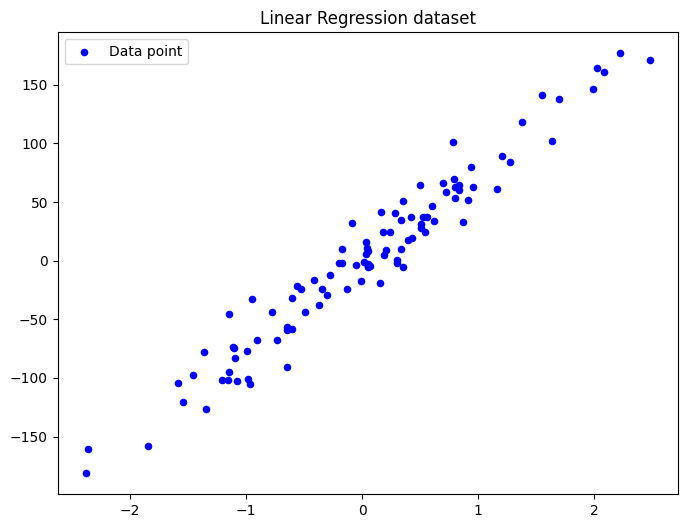

In [2]:
X , y = datasets.make_regression(n_samples = 100, n_features = 1, noise=20, random_state = 4)
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2, random_state = 1234)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0],y, color="blue", marker="o", s = 20)
plt.legend(['Data point'])
plt.title('Linear Regression dataset')
plt.show()

In [3]:
print(X_train.shape)
print(y_train.shape)

(80, 1)
(80,)


Linear Regression

In [4]:
class LinearRegression:
  def __init__(self, lr , n_iters=1000 ):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X , y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    #updating values
    for _ in range(self.n_iters):
      y_predicted = np.dot(X, self.weights) + self.bias #equation of slope

      dw = (1/n_samples) * np.dot(X.T , y_predicted - y)
      db = (1/n_samples) * np.sum(y_predicted - y)

      self.weights -= self.lr * dw
      self.bias -= self.lr *db

  def predict(self , X):
    y_predicted = np.dot(X, self.weights) + self.bias
    return y_predicted

In [20]:
def algo_call(lr):
  regressor = LinearRegression(lr)
  regressor.fit(X_train, y_train)
  predicted = regressor.predict(X_test)
  mse_value = mse(y_test, predicted)
  print("The Mean Square error is : ",mse_value)

  y_pred_line = regressor.predict(X)
  cmap = plt.get_cmap('viridis')
  fig = plt.figure(figsize=(8,6))
  m1 = plt.scatter(X_train, y_train , color=cmap(0.9), s=10)
  m2 = plt.scatter(X_test , y_test, color=cmap(0.5), s=10)
  plt.plot(X, y_pred_line, color='black', linewidth=2, label="Prediction")
  plt.legend(['Feature','Label','Prediction'])

  return 0;


def mse(y_true, y_predicted):
  return np.mean((y_true - y_predicted)**2)

Testing the model when learning rate is 0.001

The Mean Square error is :  783.8155465125494


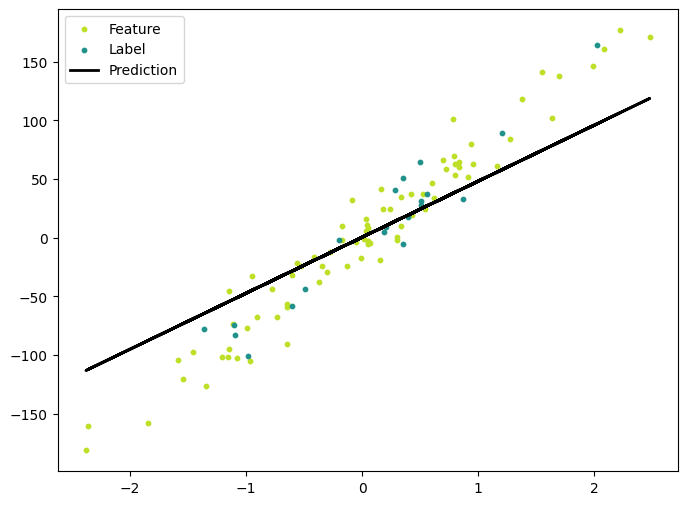

In [21]:
model_1 = algo_call(0.001)

Testing the model when the learning rate is 0.01

The Mean Square error is :  305.7719958301902


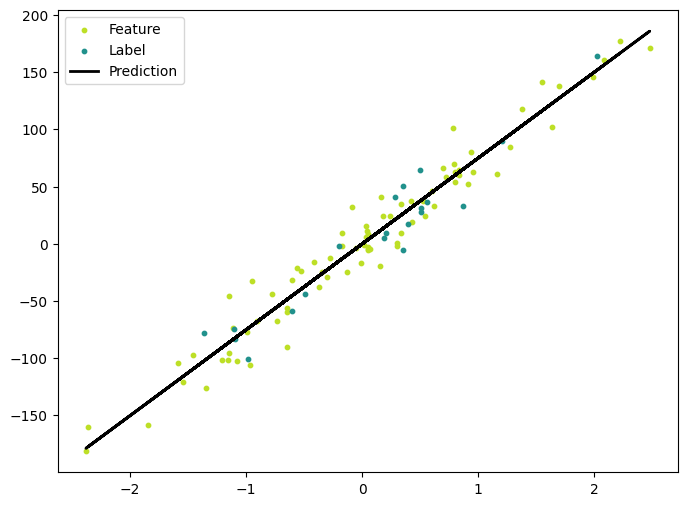

In [22]:
model_2 =algo_call(0.01)